#### Overdose deaths(y label) distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
root_dir = "/Users/h6x/ORNL/git/modeling-ideas/overdose modeling for entire country/data/processed data/svi with hepvu/2018/annotation 2018"
annotation_dir = os.path.join(root_dir, "annotation_NOD.csv")

In [3]:
data = pd.read_csv(annotation_dir,dtype={'STCNTY': str} )

array([[<Axes: title={'center': 'NOD'}>]], dtype=object)

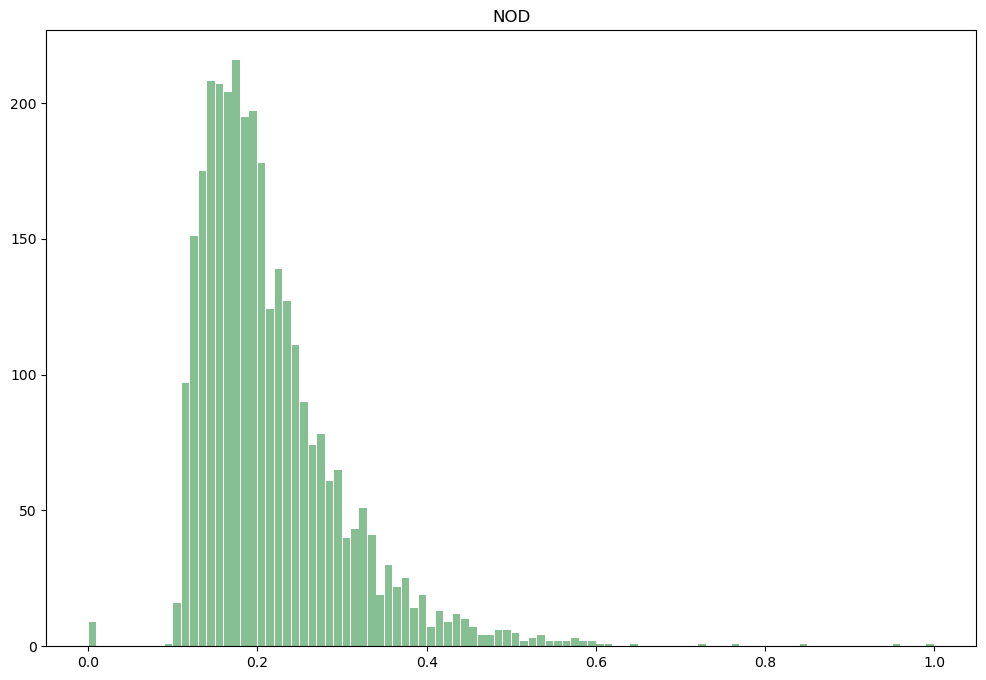

In [5]:
#plot a histogram of the data
data.hist(column='NOD', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


Dividing into bins and selecting set of data from each bin

In [9]:
df = data.__deepcopy__()

In [12]:
# Sample data creation
np.random.seed(0)

# Step 1: Create bins using pd.cut
df['bins'] = pd.cut(df['NOD'], bins=100)

# Step 2: Group by the bins
grouped = df.groupby('bins')

# Step 3: Sample 10 data points or less from each bin
sampled_df_list = [group.sample(n=min(len(group), 2), random_state=1) for name, group in grouped]

# Step 4: Concatenate the sampled data points into a new DataFrame
sampled_df = pd.concat(sampled_df_list).reset_index(drop=True)

# Display the result
print(sampled_df)

    STCNTY  percentile       NOD            bins
0    08123           0  0.000000  (-0.001, 0.01]
1    02198           1  0.000000  (-0.001, 0.01]
2    19167           0  0.098055     (0.09, 0.1]
3    19141           0  0.103728     (0.1, 0.11]
4    46079           0  0.105348     (0.1, 0.11]
..     ...         ...       ...             ...
106  35039           4  0.721232    (0.72, 0.73]
107  54047           4  0.762561    (0.76, 0.77]
108  54005           4  0.840357    (0.84, 0.85]
109  24510           4  0.954619    (0.95, 0.96]
110  54011           4  1.000000     (0.99, 1.0]

[111 rows x 4 columns]


array([[<Axes: title={'center': 'NOD'}>]], dtype=object)

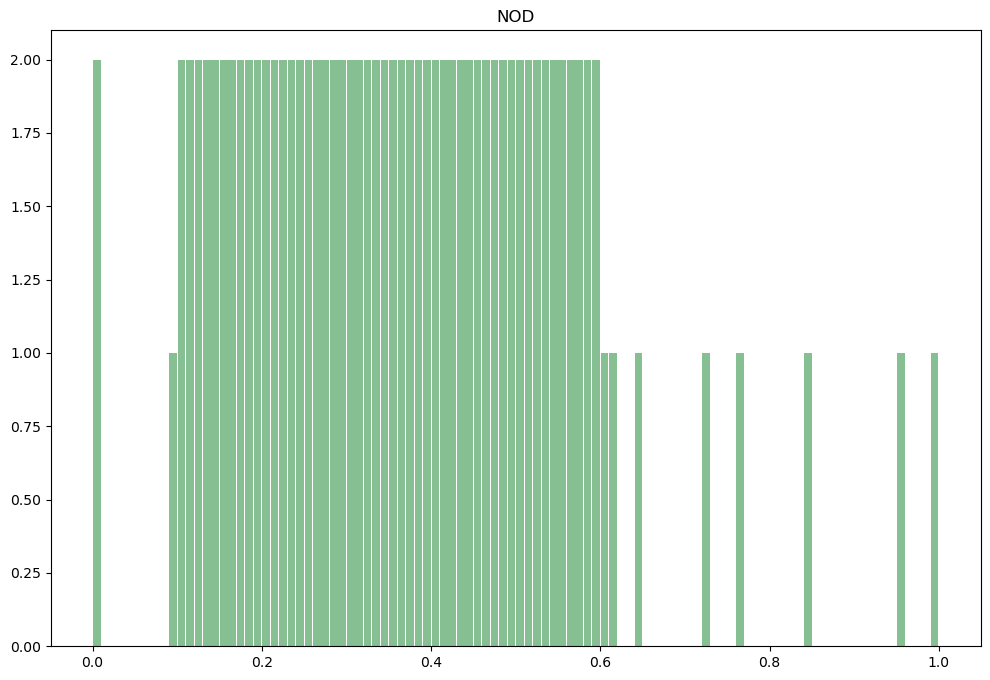

In [13]:
# plot the sampled data
sampled_df.hist(column='NOD', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [9]:
# # filter the data where NOD between 0.1-0.5
# data_filtered = sampled_df[(sampled_df['NOD'] > 0.1) & (sampled_df['NOD'] < 0.5)]
# data_filtered

In [ ]:
# save the sampled data
sampled_df.to_csv(os.path.join(root_dir, "annotation_NOD_sample_10_low_range.csv"), index=False)